In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from pearc19_model import pop_dyn

In [2]:
N1 = 50
N2 = 50

brW_vec = np.linspace(0.001  ,   0.01, N1)
dfW_vec = np.linspace(0.5   , 1, N2)

D,B = np.meshgrid(dfW_vec,brW_vec)

M_per = np.zeros((N1,N2))
W_per = np.zeros((N1,N2))

for i in range(N1):
    for j in range(N2):
        t,M,W = pop_dyn(brW = brW_vec[i],dfW = dfW_vec[j])
        M_peaks, _ = find_peaks(M) 
        W_peaks, _ = find_peaks(W)
        M_per[i][j] = np.mean(M_peaks[1:] - M_peaks[:-1])
        W_per[i][j] = np.mean(W_peaks[1:] - W_peaks[:-1])

/home/sajid/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sajid/miniconda3/envs/py3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


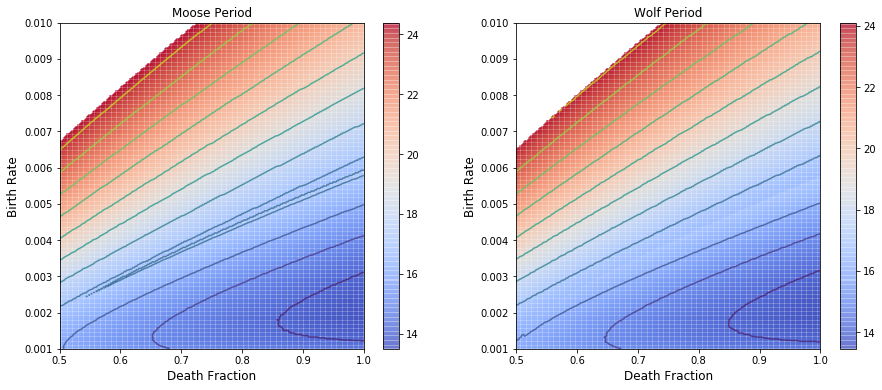

In [3]:
plt.rcParams["figure.figsize"] = (15,6)
f,(ax1,ax2) = plt.subplots(1,2)
im1 = ax1.pcolormesh(D,B,np.sqrt(M_per),cmap='coolwarm',alpha=0.5)
ax1.contour(D,B,np.sqrt(M_per),alpha=0.75,levels=10)
ax1.set_xlabel('Death Fraction',size=12)
ax1.set_ylabel('Birth Rate',size=12)
ax1.set_title('Moose Period')
f.colorbar(im1,ax=ax1)
im2 = ax2.pcolormesh(D,B,np.sqrt(W_per),cmap='coolwarm',alpha=0.5)
ax2.contour(D,B,np.sqrt(W_per),alpha=0.75,levels=10)
ax2.set_xlabel('Death Fraction',size=12)
ax2.set_ylabel('Birth Rate',size=12)
ax2.set_title('Wolf Period')
f.colorbar(im2,ax=ax2)
plt.savefig('sqrt_per_vary_W.png', dpi=250)
plt.show()